In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Bài 1 :Dùng Pandas đọc file.

datasource=pd.read_csv('./income_spend.csv')
datasource.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [ ]:
# Bài 2: Xây dựng hàm tính khoảng cách từ tất cả các điểm đến centroid. (1 điểm)

# Tổng khoảng cách trong các cluster
def caldistancecluster(taphop, centroid):
    import math
    kq=0
    for i in range (taphop.shape[0]):
        lenx=(taphop[i,0]-centroid[0])
        leny=(taphop[i,1]-centroid[1])
        kq+=math.sqrt(lenx**2+leny**2)
    return kq
def calWCSS(dataSet,label,centroid,k):
    kq=0
    for i in range(centroid.shape[0]):
        kq+=caldistancecluster(dataSet[label==i],centroid[i])
    return kq    

In [4]:
#Bài 3: Dùng K-means trong thư viện Sklearn để xác định centroid. Với K từ 1 đến 10
# tương ứng với mỗi K thì tính WCSS bằng dùng hàm ở trên.

income=np.array(datasource['INCOME'].values)
spend=np.array(datasource['SPEND'].values)
income_spend=np.array(datasource[['INCOME','SPEND']].values)

WCSSarr=np.array([])
for i in range (1,11):
    print('\n\nSố cluster là : ',i)
    kmeans = KMeans(n_clusters=i, random_state=0).fit(income_spend)
    WCSS=calWCSS(income_spend,kmeans.labels_,kmeans.cluster_centers_,i)
    print('Vị trí các centroid là : \n',kmeans.cluster_centers_)
    print('Tổng khoảng cách ở tất cả các cụm (WCSS) là : ',WCSS)
    WCSSarr=np.append(WCSSarr,WCSS)



Số cluster là :  1
Vị trí các centroid là : 
 [[245.27392739 149.64686469]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  13841.612429298166


Số cluster là :  2
Vị trí các centroid là : 
 [[291.58064516 146.71774194]
 [213.19553073 151.67597765]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  9863.216326364152


Số cluster là :  3
Vị trí các centroid là : 
 [[196.68224299 150.57943925]
 [317.55       148.73333333]
 [251.61764706 149.31617647]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  8282.19621632994


Số cluster là :  4
Vị trí các centroid là : 
 [[259.76086957 118.58695652]
 [319.53571429 151.73214286]
 [194.19587629 149.50515464]
 [246.51923077 162.39423077]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  7418.479188926321


Số cluster là :  5
Vị trí các centroid là : 
 [[194.68085106 125.70212766]
 [320.52830189 153.67924528]
 [195.05769231 167.82692308]
 [243.21568627 161.71568627]
 [269.97959184 123.83673469]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  6642.01811865

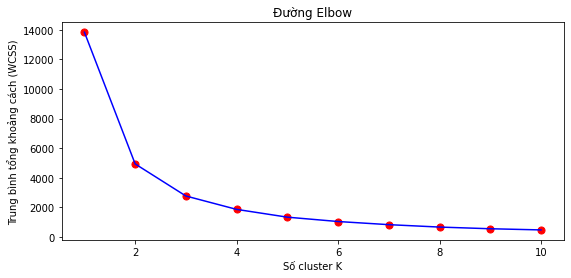

In [5]:
#Bài 4 . Vẽ đường Elbow để xác định 2 số K tối ưu. (1 điểm) (K=4 và 6)

kcluster=np.array([1,2,3,4,5,6,7,8,9,10])
for i in range (10):
    WCSSarr[i]=WCSSarr[i]/(i+1)

plt.figure(figsize=(9,4))
plt.title('Đường Elbow')
plt.xlabel('Số cluster K')
plt.ylabel('Trung bình tổng khoảng cách (WCSS)')

plt.scatter(kcluster,WCSSarr,s=50,c='red')
plt.plot(kcluster, WCSSarr, 'b-')
plt.show()



Số cluster là :  1


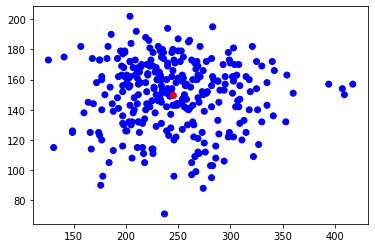

Vị trí các centroid là : 
 [[245.27392739 149.64686469]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  13841.612429298166


Số cluster là :  2


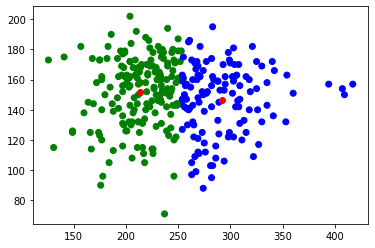

Vị trí các centroid là : 
 [[291.58064516 146.71774194]
 [213.19553073 151.67597765]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  9863.216326364152


Số cluster là :  3


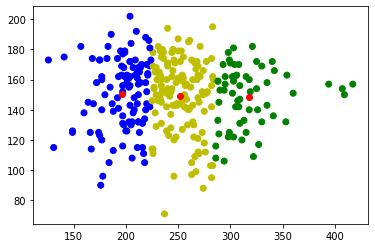

Vị trí các centroid là : 
 [[196.68224299 150.57943925]
 [317.55       148.73333333]
 [251.61764706 149.31617647]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  8282.19621632994


Số cluster là :  4


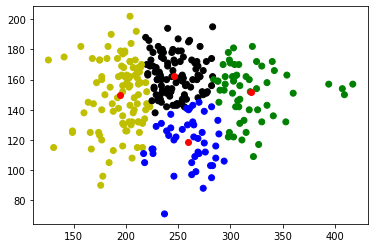

Vị trí các centroid là : 
 [[259.76086957 118.58695652]
 [319.53571429 151.73214286]
 [194.19587629 149.50515464]
 [246.51923077 162.39423077]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  7418.479188926321


Số cluster là :  5


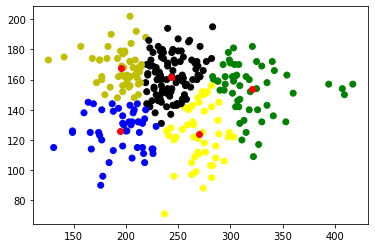

Vị trí các centroid là : 
 [[194.68085106 125.70212766]
 [320.52830189 153.67924528]
 [195.05769231 167.82692308]
 [243.21568627 161.71568627]
 [269.97959184 123.83673469]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  6642.018118654096


Số cluster là :  6


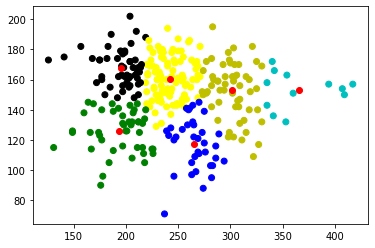

Vị trí các centroid là : 
 [[265.58333333 117.44444444]
 [193.93478261 125.63043478]
 [301.07142857 152.91071429]
 [195.05769231 167.82692308]
 [242.03960396 160.46534653]
 [365.58333333 153.25      ]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  6201.6503908677


Số cluster là :  7


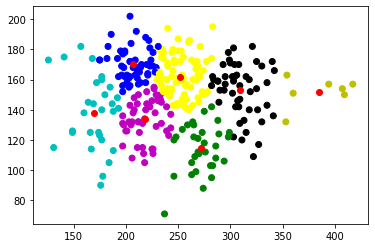

Vị trí các centroid là : 
 [[206.81132075 170.1509434 ]
 [271.625      114.46875   ]
 [384.85714286 152.        ]
 [309.55102041 153.14285714]
 [252.24096386 161.5060241 ]
 [169.89655172 138.10344828]
 [218.8        133.68      ]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  5748.140479426854


Số cluster là :  8


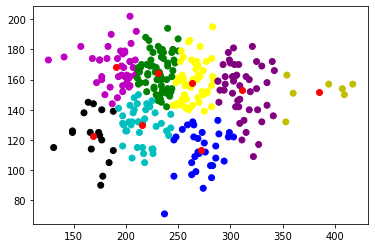

Vị trí các centroid là : 
 [[272.19354839 113.03225806]
 [231.10606061 164.56060606]
 [384.85714286 152.        ]
 [168.94117647 122.52941176]
 [263.46296296 157.72222222]
 [215.34146341 130.17073171]
 [190.21428571 168.4047619 ]
 [311.46666667 153.42222222]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  5265.725308450163


Số cluster là :  9


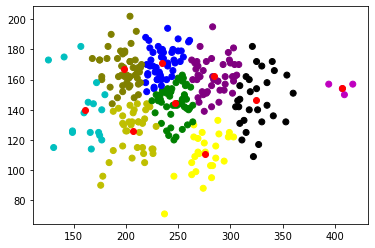

Vị trí các centroid là : 
 [[235.         170.875     ]
 [246.7254902  144.7254902 ]
 [207.2972973  125.75675676]
 [324.89655172 146.62068966]
 [275.65384615 110.5       ]
 [160.82352941 139.88235294]
 [406.75       154.5       ]
 [284.09090909 162.29545455]
 [198.61702128 166.91489362]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  4901.453052974591


Số cluster là :  10


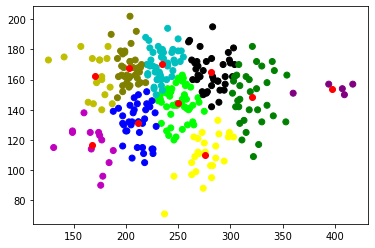

Vị trí các centroid là : 
 [[211.5        131.13157895]
 [320.75757576 148.66666667]
 [170.29411765 162.58823529]
 [281.15789474 165.13157895]
 [276.08       109.72      ]
 [234.43478261 170.08695652]
 [167.23076923 116.53846154]
 [397.4        153.8       ]
 [203.37837838 167.78378378]
 [249.90196078 144.23529412]]
Tổng khoảng cách ở tất cả các cụm (WCSS) là :  4654.174074888233


In [6]:
# bài 5 :Đưa ra nhận xét về từng cụm trong mỗi số K bằng cách vẽ lên trục toạ độ tất cả các điểm và Centroid
# Dựa vào kết quả nhận xét số K nào tối ưu hơn
for i in range (1,11):
    print('\n\nSố cluster là : ',i)
    kmeans = KMeans(n_clusters=i, random_state=0).fit(income_spend)
    color_dict = {0:'b',1:'g', 2:'y',3:'k',4:'yellow',5:'c',6:'m',7:'purple',8:'olive',9:'lime',10:'b'}
    colors = [color_dict[j] for j in kmeans.labels_]
    plt.scatter(income,spend,c=colors)
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'r',)
    plt.show()
    print('Vị trí các centroid là : \n',kmeans.cluster_centers_)
    WCSS=calWCSS(income_spend,kmeans.labels_,kmeans.cluster_centers_,i)
    print('Tổng khoảng cách ở tất cả các cụm (WCSS) là : ',WCSS)

In [62]:
def cald4centroid(point,centroids):
    import math
    distantarr=np.array([])
    for i in range(centroids.shape[0]):
        lenx=(point[0]-centroids[i,0])
        leny=(point[1]-centroids[i,1])
        dis=math.sqrt(lenx**2+leny**2)
        distantarr=np.append(distantarr,dis)
    for i in range(distantarr.shape[0]):
        for j in range(i+1,distantarr.shape[0]):
            if (distantarr[i]==distantarr[j]):
                return True
    return False


In [65]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(income_spend)
print('Vị trí các centroid là : \n',kmeans.cluster_centers_)
for i in range(income_spend.shape[0]):
    x=cald4centroid(income_spend[i],kmeans.cluster_centers_)
    if (x): print(x)


Vị trí các centroid là : 
 [[259.76086957 118.58695652]
 [319.53571429 151.73214286]
 [194.19587629 149.50515464]
 [246.51923077 162.39423077]]


In [60]:
x=income_spend[0,0]-kmeans.cluster_centers_[i,0]
income_spend.shape[0]
# cald4centroid(income_spend,kmeans.cluster_centers_)


TypeError: 'int' object is not iterable